# **Model Benchmarks and Tuning**

### **Imports**
---

In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

### **Load the data**
-----

In [652]:
train = pd.read_csv('../data/train_engineered.csv')
print(train.shape)
train.head()

(1272, 242)


,Id,parcel_id,zoning_type,lot_frontage,lot_area,util_avail,house_quality,year_built,year_remodeled,masonry_veneer_area,...,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,finished_space,basement_space,garage_yr_built_comb,total_bathrooms,total_living_area
0,544,531379050,RL,43.0,11492.0,AllPub,7,1996,1997,132.0,...,0,0,0,0,1,0.0,251988.0,3986012.0,4,2759.0
1,153,535304180,RL,68.0,7922.0,AllPub,5,1953,2007,0.0,...,0,0,0,0,1,0.0,344582.0,3814209.0,2,1788.0
2,318,916386060,RL,73.0,9802.0,AllPub,5,2006,2007,0.0,...,0,0,0,0,1,0.0,147456.0,4026042.0,3,1444.0
3,255,906425045,RL,82.0,14235.0,AllPub,6,1900,1993,0.0,...,0,0,0,0,1,0.0,456976.0,3718300.0,2,1445.0
4,2827,908186070,RM,35.0,3675.0,AllPub,6,2005,2006,82.0,...,0,1,0,0,0,0.0,0.0,4020025.0,3,1619.0


In [653]:
test = pd.read_csv('../data/test_engineered.csv')
print(test.shape)
test.head()

(878, 242)


,Id,parcel_id,zoning_type,lot_frontage,lot_area,util_avail,house_quality,year_built,year_remodeled,masonry_veneer_area,...,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,finished_space,basement_space,garage_yr_built_comb,total_bathrooms,total_living_area
0,2658,902301120,RM,69.0,9142.0,AllPub,6,1910,1950,0.0,...,0,0,0,0,1,0.0,1040400.0,3648100.0,2,1928.0
1,2718,905108090,RL,NaN,9662.0,AllPub,5,1977,1977,0.0,...,0,0,0,0,1,0.0,3869089.0,3908529.0,2,1967.0
2,2414,528218130,RL,58.0,17104.0,AllPub,7,2006,2006,0.0,...,0,1,0,0,0,0.0,65400.0,4024036.0,4,2050.0
3,1989,902207150,RM,60.0,8520.0,AllPub,5,1923,2006,0.0,...,0,0,0,0,1,0.0,937024.0,3721005.0,1,968.0
4,625,535105100,RL,NaN,9500.0,AllPub,6,1963,1963,247.0,...,0,0,0,0,1,0.0,1094290.0,3853369.0,3,2003.0


### Model Benchmark

In [654]:
# add features from strongest model so far
features = [col for col in test._get_numeric_data().columns if col != 'SalePrice' and test[col].isnull().sum() == 0 and col not in ['zoning_type_I (all)',
            'util_avail_NoSewr', 'ames_neighborhood_BrDale', 'prox_to_transport_2_PosA', 'floors_2.5Fin', 'roof_material_Metal', 'roof_material_Roll',
            'roof_material_WdShngl', 'ext_covering_AsphShn', 'ext_covering_PreCast', 'ext_covering2_Other', 'ext_covering2_PreCast', 'masonry_veneer_type_CBlock',
            'masonry_veneer_type_nan', 'foundation_type_Slab', 'basement_finished_rating_nan', 'basement_finished_rating2_nan', 'heating_type_GasA',
            'full_bathrooms_above_ground_4', 'kitchens_above_ground_1', 'garage_finished_nan', 'garage_car_capacity_1', 'sale_type_VWD', 'basement_space','finished_space']]          

In [655]:
#this code was adapted from lesson 3.02 on linear regression metrics
X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'Training Shape: {X_train.shape, y_train.shape}')
print(f'Test Shape: {X_test.shape, y_test.shape}')

lr = LinearRegression()
lr.fit(X_train, y_train)

Training Shape: ((954, 206), (954,))
Test Shape: ((318, 206), (318,))


LinearRegression()

In [656]:
#mean of Y
null_preds = y.median()
null_preds

157000.0

In [657]:
null_residuals = y - null_preds
null_residuals

0        63000.0
1       -48000.0
2        17000.0
3       -18500.0
4       -17000.0
          ...   
1267     25000.0
1268    141751.0
1269     20000.0
1270    -13000.0
1271     32000.0
Name: SalePrice, Length: 1272, dtype: float64

In [658]:
#null MSE
null_sse = sum(null_residuals ** 2)
null_mse = null_sse / len(null_residuals)
null_mse

2831842680.6375785

## Comparing Metrics from highest scoring model

In [659]:
print(f'Training score: {lr.score(X_train, y_train)}')
print(f'Test score: {lr.score(X_test, y_test)}')
print(f'Cross validation score: {cross_val_score(lr, X_train, y_train).mean()}')

Training score: 0.9387922101368606
Test score: 0.8973763612693352
Cross validation score: 0.8809275726474372


In [660]:
#Latest model MSE
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

model_sse = metrics.mean_squared_error(y_test, preds)
np.sqrt(model_sse)

16740.79241908621

In [661]:
#null MSE
np.sqrt(null_mse)

53215.060656148635

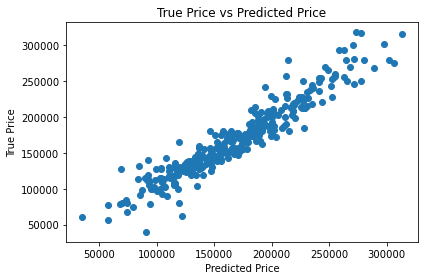

In [662]:
plt.scatter(preds, y_test);

plt.title('True Price vs Predicted Price')

plt.xlabel("Predicted Price")
plt.ylabel('True Price');

plt.tight_layout()
plt.savefig('../images/predictive_model.png')

----
# Production Model
### Balancing Performance with Interpretability
### Pre-Feature Engineering Dataset: Testing Simpler models

In [663]:
# read in the pre-engineered datasets
train = pd.read_csv('../data/train_preprocessed.csv')
test = pd.read_csv('../data/test_preprocessed.csv')

In [664]:
train.shape

(1272, 244)

In [665]:
train.corr()[['SalePrice']]

,SalePrice
Id,-0.047748
parcel_id,-0.214173
lot_frontage,0.287084
lot_area,0.293859
house_quality,0.796371
...,...
sale_type_ConLw,-0.050995
sale_type_New,0.267892
sale_type_Oth,-0.037267
sale_type_VWD,NaN


In [666]:
#Neighborhood correlation with sale price
train.corr()[['SalePrice','ames_neighborhood_Blueste','ames_neighborhood_BrDale','ames_neighborhood_BrkSide','ames_neighborhood_ClearCr',
              'ames_neighborhood_Crawfor','ames_neighborhood_Edwards','ames_neighborhood_Gilbert','ames_neighborhood_Greens',
              'ames_neighborhood_IDOTRR','ames_neighborhood_MeadowV','ames_neighborhood_Mitchel',
              'ames_neighborhood_NoRidge', 'ames_neighborhood_NPkVill','ames_neighborhood_NridgHt','ames_neighborhood_NridgHt',
              'ames_neighborhood_NWAmes','ames_neighborhood_OldTown','ames_neighborhood_SWISU','ames_neighborhood_Sawyer',
              'ames_neighborhood_SawyerW','ames_neighborhood_Somerst','ames_neighborhood_StoneBr','ames_neighborhood_Timber',
              'ames_neighborhood_Veenker']].sort_values(by = 'SalePrice', ascending = False)      

,SalePrice,ames_neighborhood_Blueste,ames_neighborhood_BrDale,ames_neighborhood_BrkSide,ames_neighborhood_ClearCr,ames_neighborhood_Crawfor,ames_neighborhood_Edwards,ames_neighborhood_Gilbert,ames_neighborhood_Greens,ames_neighborhood_IDOTRR,...,ames_neighborhood_NridgHt,ames_neighborhood_NWAmes,ames_neighborhood_OldTown,ames_neighborhood_SWISU,ames_neighborhood_Sawyer,ames_neighborhood_SawyerW,ames_neighborhood_Somerst,ames_neighborhood_StoneBr,ames_neighborhood_Timber,ames_neighborhood_Veenker
SalePrice,1.000000,0.005107,NaN,-0.149647,2.088557e-02,0.076874,-0.217773,0.081425,0.020135,-0.211633,...,0.330672,0.057714,-0.284086,-0.105902,-0.123953,0.078677,0.292388,0.093131,0.183046,0.083328
house_quality,0.796371,0.065354,NaN,-0.106873,9.413033e-18,0.031207,-0.195448,0.097845,0.080073,-0.192011,...,0.278603,0.059962,-0.223989,-0.041973,-0.161689,0.082043,0.313773,0.160910,0.154421,0.047239
exterior_quality,0.688407,0.048654,NaN,-0.116052,5.159707e-03,-0.027442,-0.153874,0.078154,0.059612,-0.159293,...,0.323150,-0.083653,-0.199460,-0.085550,-0.144296,0.153516,0.316527,0.109681,0.122646,0.062529
year_built,0.667750,0.024446,NaN,-0.269984,-4.285153e-03,-0.183204,-0.108243,0.236408,0.013736,-0.239889,...,0.236250,0.046395,-0.490041,-0.158269,-0.051204,0.160766,0.312922,0.075715,0.150350,0.034631
basement_height,0.663840,0.031225,NaN,-0.177863,1.085626e-02,-0.041508,-0.119082,0.170900,0.038258,-0.165278,...,0.284854,0.034957,-0.311870,-0.088554,-0.124310,0.139443,0.252558,0.091954,0.159173,0.036555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
foundation_type_Slab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement_finished_rating_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement_finished_rating2_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garage_finished_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Neighborhoods negatively correlated to sale price: 

BrkSide: -0.149647

Edwards: -0.217773

IDOTRR: -0.211633

OldTown: -0.284086

SWISU: -0.105902

Sawyer: -0.123953       

In [685]:
train.corr()[['SalePrice']].sort_values(by= 'SalePrice', ascending=True)
# high_corr_df = high_corr_df[high_corr_df['SalePrice'] == True]
# high_corr_df

,Id,parcel_id,zoning_type,lot_frontage,lot_area,util_avail,house_quality,year_built,year_remodeled,masonry_veneer_area,...,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,total_bathrooms,total_living_area,kitchen_quality_2,kitchen_quality_3,kitchen_quality_4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [704]:
low_corr_df = (train.corr()[['SalePrice']] < -0.3)
low_corr_df = low_corr_df[low_corr_df['SalePrice'] == True]
low_corr_df

,SalePrice
pool_quality,True
property_shape_Reg,True
masonry_veneer_type_None,True
foundation_type_CBlock,True
garage_location_Detchd,True
garage_finished_Unf,True
garage_car_capacity_1,True
kitchen_quality_2,True


### Additional EDA to develop production model

In [669]:
train['total_bathrooms'] = train['full_bathrooms_basement'] + train['half_bathrooms_basement'] + train['full_bathrooms_above_ground'] + train['half_bathrooms_above_ground']
test['total_bathrooms'] = test['full_bathrooms_basement'] + test['half_bathrooms_basement'] + test['full_bathrooms_above_ground'] + test['half_bathrooms_above_ground']

train.drop(columns = ['full_bathrooms_basement','half_bathrooms_basement','full_bathrooms_above_ground','half_bathrooms_above_ground'], inplace = True)
test.drop(columns = ['full_bathrooms_basement','half_bathrooms_basement','full_bathrooms_above_ground','half_bathrooms_above_ground'], inplace = True)

# Combine living area
train['total_living_area'] = train['finished_area'] + train['finished_area2'] + train['above_ground_living_area']
test['total_living_area'] = test['finished_area'] + test['finished_area2'] + test['above_ground_living_area']

train.drop(columns = ['finished_area', 'finished_area2', 'above_ground_living_area'], inplace=True)
test.drop(columns = ['finished_area', 'finished_area2', 'above_ground_living_area'], inplace = True)

In [670]:
train['kitchen_quality'].value_counts()

2    680
3    522
4     44
1     26
Name: kitchen_quality, dtype: int64

In [671]:
train = pd.get_dummies(data = train, columns = ['kitchen_quality'], drop_first = True)

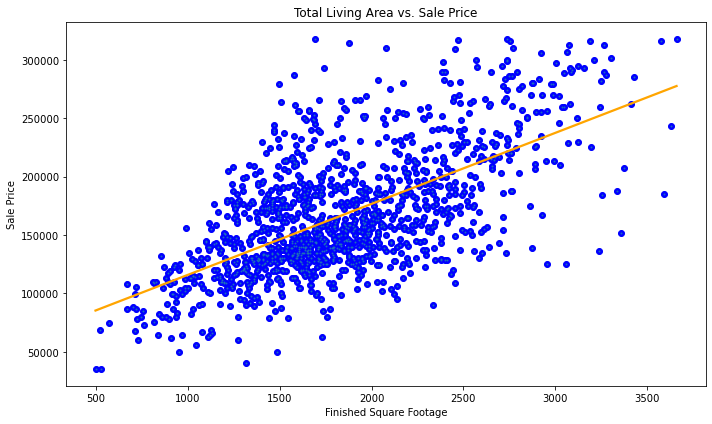

In [672]:
plt.figure(figsize = (10, 6))
plt.scatter(train['total_living_area'], train['SalePrice'],
           c = "b");
sns.regplot(x ='total_living_area',y= 'SalePrice', data=train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

plt.title('Total Living Area vs. Sale Price')
plt.xlabel('Finished Square Footage')
plt.ylabel('Sale Price');

plt.tight_layout()
plt.savefig('../images/square_footage_corr.png')

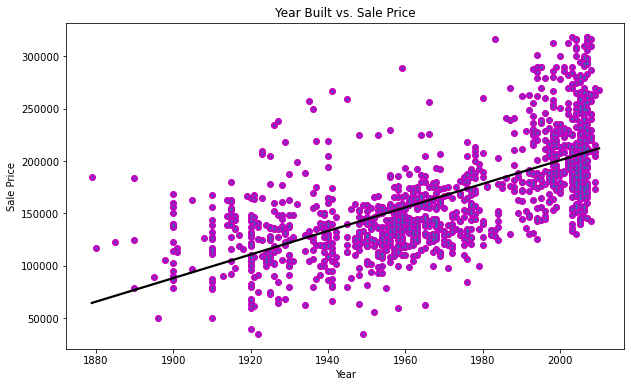

In [673]:
plt.figure(figsize = (10, 6))
plt.scatter(train['year_built'], train['SalePrice'],
           c = "m");
sns.regplot(x ='year_built',y= 'SalePrice', data=train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'black'})

plt.title('Year Built vs. Sale Price')
plt.xlabel('Year')
plt.ylabel('Sale Price');

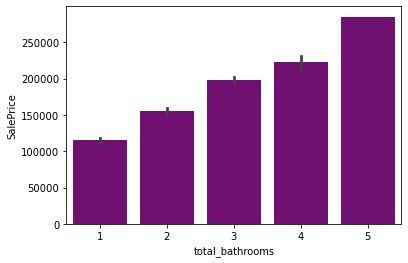

In [674]:
sns.barplot(x='total_bathrooms', y='SalePrice', data=train, color='purple');

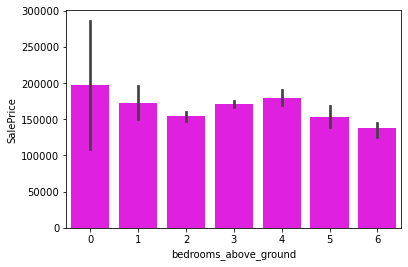

In [675]:
sns.barplot(x='bedrooms_above_ground', y='SalePrice', data=train, color='magenta');

In [676]:
# Run the production model

In [712]:
X = train[['total_living_area','year_built','kitchen_quality_2','kitchen_quality_3','kitchen_quality_4','year_remodeled','exterior_quality','bedrooms_above_ground','garage_location_Detchd','garage_finished_Unf','garage_car_capacity_1','house_quality']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'Training Shape: {X_train.shape, y_train.shape}')
print(f'Test Shape: {X_test.shape, y_test.shape}')

lr = LinearRegression()
lr.fit(X_train, y_train)

#Training Score
print(f'Training R2 Score: {lr.score(X_train, y_train)}')
#Test Score
print(f'Test R2 Score: {lr.score(X_test, y_test)}')

Training Shape: ((954, 12), (954,))
Test Shape: ((318, 12), (318,))
Training R2 Score: 0.8404239610858837
Test R2 Score: 0.824476974363038


In [713]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

#cross validation score
print(f'Cross-validated: {cross_val_score(lr, X_train, y_train).mean()}')

Root Mean Squared Error: 24185.666067281036
Cross-validated: 0.836993432379705


In [719]:
r2 = lr.score(X_test, y_test)
print(f'Adjusted R-Squared for test: {1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))}')

Adjusted R-Squared for test: 0.7903612313519102


In [714]:
# Compare to null Root Mean Squared error
np.sqrt(null_mse)

53215.060656148635

In [715]:
# The linear regression model's predicted home prices are off by about $24,185 relative to observed home prices,
# whereas the null model is off by about $52,262
# $30,000 difference where we can capture that difference.

In [716]:
coef_df = pd.DataFrame(lr.coef_, index = X.columns, columns = ['Coefficients'])
coef_df.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
kitchen_quality_4,27101.009078
house_quality,15536.598056
exterior_quality,12200.352469
bedrooms_above_ground,3563.576275
kitchen_quality_3,3217.042488
year_remodeled,271.635005
year_built,169.984103
total_living_area,32.923880
garage_finished_Unf,-1676.504350
kitchen_quality_2,-2723.504185


In [718]:
# looking at average basement area for recommendations
# profit from finishing the average unfinished basement area
(train['unfinished_area']).mean() * 32.923880 #the coefficient for living area

19450.998637012577

In [ ]:
train['garage_location_']

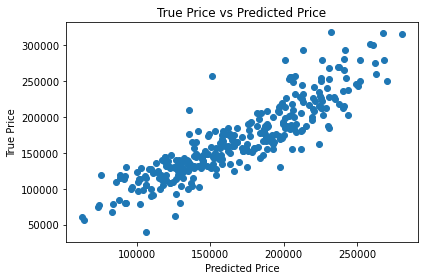

In [683]:
plt.scatter(predictions, y_test);

plt.title('True Price vs Predicted Price')

plt.xlabel("Predicted Price")
plt.ylabel('True Price');

plt.tight_layout()
plt.savefig('../images/inferential_model.png')